In [ ]:
# dependencies
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st

In [ ]:
#import csv
df = pd.read_csv("total_store_fixed_counties.csv")
df.count()

In [ ]:
# Create df with only Heinen's stores to identify different names
heinens_df = df[df['Store Name'].str.match('Heinen') == True]
heinens_df

In [ ]:
# Remove bad data
df.drop([273,274], inplace=True, axis='rows')
print(df)

In [ ]:
# Rename all Heinen's stores to a common name
df = df.replace({"Heinen's Grocery Store": "Heinen's", "Heinen's of Downtown Cleveland": "Heinen's", "Heinen's grocery": "Heinen's", "The Tasting Room Bistro at Heinen's of Chagrin Falls": "Heinen's"})
df.tail(10)

In [ ]:
# Create df with only Dave's stores
daves_df = df[df['Store Name'].str.match('Dave') == True]
daves_df

In [ ]:
# Remove bad data
df.drop([249], inplace=True, axis='rows')

In [ ]:
# Rename all Dave's stores to a common name
df = df.replace({"Dave's Markets Middlebury Market": "Dave's Markets", "Dave's Supermarket": "Dave's Markets", "Dave's Markets Ohio City": "Dave's Markets", "Dave's Mercado": "Dave's Markets","Dave's Markets Slavic Village": "Dave's Markets", "Dave's Markets Turneytown": "Dave's Markets", "Dave's Markets Harvard & Lee": "Dave's Markets","Dave's Markets Wilson Mills": "Dave's Markets", "Dave's Markets Cedar Hill": "Dave's Markets", "Dave's Markets Severance": "Dave's Markets", "Dave's Markets Euclid Beach": "Dave's Markets", "Dave's Markets Shore Center": "Dave's Markets", "Dave's Market & eatery": "Dave's Markets"})

In [ ]:
# Create df with only Walmart stores
walmart_df = df[df['Store Name'].str.match('Wal') == True]
walmart_df

In [ ]:
# Remove bad data
df.drop([56,57,58], inplace=True, axis='rows')

In [ ]:
# Rename all Walmart stores to a common name
df = df.replace({"Walmart Supercenter": "Walmart"})

In [ ]:
# Create df with only Giant Eagle stores
ge_df = df[df['Store Name'].str.match('Giant') == True]
ge_df

In [ ]:
# Remove bad data
df.drop([75,77,112], inplace=True, axis='rows')

In [ ]:
# Rename all Giant Eagle stores to a common name
# Rename Berry's & Whole Foods to shorter names to show up well on chart
df = df.replace({"Giant Eagle Market District": "Giant Eagle", "Giant Eagle Supermarket": "Giant Eagle","Berry's Natural Food Market": "Berry's","Whole Foods Market":"Whole Foods"})

df.sample(20)

In [ ]:
# Create df with only Marc's stores
marcs_df = df[df['Store Name'].str.match('Marc') == True]
marcs_df
#All clean

In [ ]:
# Create df with only Whole Foods stores
wf_df = df[df['Store Name'].str.match('Whole') == True]
wf_df

In [ ]:
# Rename all Whole Foods stores to a common name
df = df.replace({"Whole Foods Market 365": "Whole Foods"})

In [ ]:
# Create df with only Costco stores
costco_df = df[df['Store Name'].str.match('Costco') == True]
costco_df
#All clean

In [ ]:
# Create df with only Sam's Club stores
sams_df = df[df['Store Name'].str.match('Sam') == True]
sams_df
#All clean

In [ ]:
# Create df with only BJ's Wholesale stores
bjs_df = df[df['Store Name'].str.match('BJ') == True]
bjs_df
#All clean

In [ ]:
#Check that all stores were combined into common names
df['Store Name'].value_counts()

In [ ]:
#Delete ATM Wal-mart row
atm_df = df[df['Store Name'].str.match('ATM') == True]
atm_df

In [ ]:
# Remove row
df.drop([63], inplace=True, axis='rows')

In [ ]:
#Check store names again
count = df['Store Name'].value_counts()
count

In [ ]:
# Import census data
census_df = pd.read_csv("Project/census_data_counties.csv")
census_df.dtypes

In [55]:
# Merge store dataframe and census dataframe
complete_df = pd.merge(df, census_df, left_on='County', right_on='Name', how='inner')
complete_df.head()

,Store Name,Lat,Lng,Address,Place ID,County,Name,Population,Household Income,Per Capita Income,Poverty Count,Poverty Rate
0,Costco Wholesale,41.265324,-81.507401,"6720 Bass Pro Dr, Hudson",ChIJrwEsWXIgMYgRnko93meT4s0,Summit County,Summit County,"541,810","$ 55,448","$ 32,055","69,576",12.84%
1,BJ's Wholesale,41.115934,-81.482591,"1677 Home Ave, Akron",ChIJr1lVVGUoMYgRZyNHvaFakyk,Summit County,Summit County,"541,810","$ 55,448","$ 32,055","69,576",12.84%
2,Target,41.120956,-81.477382,"449 Howe Avenue, Cuyahoga Falls",ChIJ4yprBHwoMYgRH8i8pVsr_wg,Summit County,Summit County,"541,810","$ 55,448","$ 32,055","69,576",12.84%
3,Target,41.128045,-81.605230,"2801 West Market Street, Fairlawn",ChIJGTnBXK3QMIgRDgULwwfSHv8,Summit County,Summit County,"541,810","$ 55,448","$ 32,055","69,576",12.84%
4,Target,40.983936,-81.495815,"762 Arlington Ridge, Akron",ChIJs7bpDL8qMYgRm6Akf2ZDq08,Summit County,Summit County,"541,810","$ 55,448","$ 32,055","69,576",12.84%


In [ ]:
# Delete duplicate county column
#complete_df.drop(columns=['Name'])
complete_df.drop('Name', axis=1, inplace=True)

In [ ]:
# Write data to file
complete_df.to_csv("complete_data.csv",index=False,header=True)

In [ ]:
# Set up data for store count chart
store_counts = pd.Series(count)
x_labels = count.index.to_list()
store_counts

In [ ]:
# Create bar chart of grocery stores and warehouse clubs
x_axis = np.arange(len(store_counts))
plt.bar(x_axis,store_counts,color='g',align='center')

# Set limits of chart
plt.xlim(-0.75, len(x_axis)-0.25)
plt.ylim(0,50)

# Set up x-axis tick marks
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations,x_labels,rotation=90) 

# Enter title and labels
plt.title("Count of Grocery Stores in NE Ohio")
plt.xlabel("Store Name")
plt.ylabel("Count of Grocery Stores")

plt.tight_layout()
plt.savefig("store_count_bar_chart.png")
plt.show()

In [ ]:
# Create scatter plot of population vs grocery count by county
# Determine store counts by county
store_count_by_cty = complete_df.groupby(['County']).count()
store_count_list = store_count_by_cty['Lat']
store_count_list

In [ ]:
# Hold list of counties needed for later figure
counties = store_count_by_cty.index.to_list()

#Get list of populations by county
pop_list = complete_df['Population'].unique()
cty_list = complete_df['County'].unique()
pop_list_df = pd.DataFrame({
    "Population":pop_list,
    "County": cty_list })
pop_list_sorted = pop_list_df.sort_values(by='County')
pop_list_sorted

In [ ]:
# Set up scatter plot
plt.xlim(0,100)
plt.ylim(0,1400000)
plt.scatter(store_count_list,pop_list_num,marker='o')
        
# Set up title and labels
plt.title("Store Count by Population")
plt.xlabel("Store Count")
plt.ylabel("Population")

# Save figure 
plt.savefig("store_count_vs_population.png")
plt.show()

In [ ]:
# Remove commas and convert population column to numeric values
pop_list_sorted['Population'] = pop_list_sorted['Population'].str.replace(',', '') #.astype(float)
pop_list_num = pd.to_numeric(pop_list_sorted["Population"])
pop_list_num

In [ ]:
# Calculate the correlation coefficient between population and store count
store_count_list_reindex = store_count_list.reset_index(drop=True)
correlation_df = pd.DataFrame({"Store Count": store_count_list_reindex, "Population": pop_list_num})

#pearsoncorr = correlation_df.corr(method='pearson')
#print(pearsoncorr)

corr = st.pearsonr(store_count_list_reindex,pop_list_num)
print(f"The Pearson's Correlation Coefficient between county population and store count is {round(corr[0],2)}")

In [ ]:
# Perform a linear regression
vc_slope, vc_int, vc_r, vc_p, vc_std_err = stats.linregress(store_count_list_reindex, pop_list_num)

# Create equation of line to calculate predicted violent crime rate
vc_fit = vc_slope * store_count_list_reindex + vc_int

# Plot the linear model on top of scatter plot 
plt.scatter(store_count_list_reindex, pop_list_num, color='g')
plt.plot(store_count_list_reindex,vc_fit,"--")
plt.title("Store Count by Population with Linear Regression")
plt.xlabel("Store Count")
plt.ylabel("Population")
plt.xlim(0,100)
plt.ylim(0,1400000)

# Save plot
plt.savefig("store_count_vs_pop_linearreg.png")
plt.show()

In [ ]:
# Set up bar chart for store count by county
x_labels2 = store_count_list.index.to_list()
x_axis = np.arange(len(counties))
plt.bar(x_axis,store_count_list,color='r',align='center',zorder=3)

# Set limits of chart
plt.xlim(-0.75, len(x_axis)-0.25)
plt.ylim(0,100)

# Set up x-axis tick marks
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations,x_labels2,rotation=90) 

# Enter title and labels
plt.title("Count of Grocery Stores by County")
plt.xlabel("County")
plt.ylabel("Count of Grocery Stores")

plt.tight_layout()
plt.savefig("store_count_by_county.png")
plt.grid(zorder=0)
plt.show()

In [ ]:
# Create scatter plot of poverty rate vs grocery count by county
# Get list of poverty rates by county
pov_rate_list = complete_df['Poverty Rate'].unique()
pov_rate_df = pd.DataFrame({
    "Poverty Rate": pov_rate_list,
    "County": cty_list })
pov_rate_sorted = pov_rate_df.sort_values(by='County')
pov_rate_sorted

In [ ]:
# Remove percentages and convert population column to numeric values
pov_rate_sorted['Poverty Rate'] = pov_rate_sorted['Poverty Rate'].str.replace('%', '')
pov_rate_num = pd.to_numeric(pov_rate_sorted["Poverty Rate"])
pov_rate_num

In [ ]:
# Set up scatter plot
plt.xlim(0,100)
plt.ylim(0,25)
plt.scatter(store_count_list,pov_rate_num,marker='o',zorder=3)
        
# Set up title and labels
plt.title("Store Count vs Poverty Rate")
plt.xlabel("Store Count")
plt.ylabel("Poverty Rate (%)")

# Save figure 
plt.savefig("store_count_vs_povertyrate.png")
plt.grid(zorder=0)
plt.show()

In [ ]:
correlation = st.pearsonr(store_count_list_reindex,pov_rate_num)
print(f"The Pearson's Correlation Coefficient between county poverty rate and store count is {round(correlation[0],2)}")

In [56]:
# Create scatter plot of income vs grocery count by county
# Get list of incomes by county
income_list = complete_df['Household Income'].unique()
income_df = pd.DataFrame({
    "Income": income_list,
    "County": cty_list })
income_sorted = income_df.sort_values(by='County')
income_sorted

,Income,County
4,"$ 44,823",Ashtabula County
11,"$ 46,306",Columbiana County
1,"$ 48,435",Cuyahoga County
7,"$ 79,956",Geauga County
5,"$ 63,475",Lake County
2,"$ 56,965",Lorain County
3,"$ 44,682",Mahoning County
8,"$ 74,243",Medina County
9,"$ 56,618",Portage County
6,"$ 52,190",Stark County


In [57]:
# Remove dollar signs and commas and convert to numeric
income_sorted['Income'] = income_sorted['Income'].str.replace('$', '')
income_sorted['Income'] = income_sorted['Income'].str.replace(',', '')
income_num = pd.to_numeric(income_sorted["Income"])
income_num

4     44823
11    46306
1     48435
7     79956
5     63475
2     56965
3     44682
8     74243
9     56618
6     52190
0     55448
10    45975
Name: Income, dtype: int64

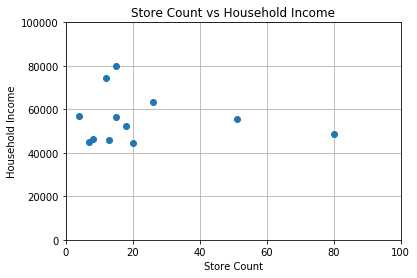

In [58]:
# Set up scatter plot
plt.xlim(0,100)
plt.ylim(0,100000)
plt.scatter(store_count_list,income_num,marker='o',zorder=3)
        
# Set up title and labels
plt.title("Store Count vs Household Income")
plt.xlabel("Store Count")
plt.ylabel("Household Income")

# Save figure 
plt.savefig("store_count_vs_income.png")
plt.grid(zorder=0)
plt.show()

In [59]:
correlation2 = st.pearsonr(store_count_list_reindex,income_num)
print(f"The Pearson's Correlation Coefficient between county household income and store count is {round(correlation2[0],2)}")

The Pearson's Correlation Coefficient between county household income and store count is -0.13
